<a href="https://colab.research.google.com/github/H-Romanini/PortifoliosPython/blob/master/AnaliseDeDadosIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Testes Estatísticos e Análise de Dados
---


Esse código foi desenvolvido com o objetivo de validar estatisticamente os dados obtidos na Iniciação Científica: **Construção, Validação por Juízes e Análize Fatorial Exploratória do Inventário de Motivação Parental Para Oferencimento De Mídias Eletrônicas a Crianças De 6-11 Anos.**(Autor: Beatriz Trevisan Salvi, Orientador: Luíz Renato Rodrigues Carreiro).



*   O código presente nesse Jupyter Notebook assim como os dados utilizados são de propriedade itelectual de seus autores sendo assim, vetada a distribuição ou cópia desses sem a autorização prévia.

**Autor:** Henrique Moreira Romanini

# Embasamento Teórico:
---


Análise Fatorial:

1.   Definição:

  A Análise Fatorial (AF) é uma técnica estatística multivariada utilizada para identificar a estrutura subjacente em um conjunto de variáveis observadas. Ela busca explicar a correlação entre variáveis através de um número reduzido de variáveis latentes, chamadas fatores.

2.  Objetivos:

  Redução de Dimensionalidade: Simplificar os dados reduzindo o número de variáveis, mantendo a maior parte da variabilidade original.

  Identificação de Estrutura: Descobrir a estrutura subjacente que explica as correlações entre variáveis.

3.  Tipos de Análise Fatorial:

* Análise Fatorial Exploratória (AFE):

    Objetivo: Explorar os dados para identificar a estrutura subjacente sem hipóteses prévias.

    Procedimento: Estima-se o número de fatores e as cargas fatoriais (loadings) das variáveis.

* Análise Fatorial Confirmatória (AFC):

    Objetivo: Testar uma hipótese específica sobre a estrutura fatorial.

    Procedimento: Especifica-se um modelo fatorial a priori e verifica-se o ajuste aos dados.

4.  Etapas da Análise Fatorial Exploratória:

  Preparação dos Dados:
  * Normalidade: As variáveis devem seguir uma distribuição normal multivariada.

  Adequação da Amostra:
  * Verifica-se a adequação com o Teste de Esfericidade de Bartlett e a Medida de Adequação da Amostra de Kaiser-Meyer-Olkin (KMO).

  Extração dos Fatores:
  * Métodos de Extração: Análise de Componentes Principais (ACP), Máxima Verossimilhança, entre outros.

  * Critérios para Determinar o Número de Fatores: Critério de Kaiser (autovalores > 1), Análise do Scree Plot, entre outros.

  Rotação dos Fatores:

  * Rotação Ortogonal (ex: Varimax): Mantém a ortogonalidade dos fatores.

  * Rotação Oblíqua (ex: Oblimin): Permite correlação entre os fatores.

5.  Interpretação dos Resultados:

  * Cargas Fatoriais: Indicadores de quanto cada variável contribui para cada fator.

  * Comunialidades: Proporção da variância de cada variável explicada pelos fatores extraídos.

6.  Interpretação e Aplicações:

  Cargas Fatoriais Altas: Indicam que a variável tem uma forte correlação com o fator.

  Aplicações: Psicologia (testes de personalidade), Marketing (segmentação de mercado), Finanças (análise de risco), entre outras.

  Exemplo Prático:
  Suponha que temos um conjunto de dados com várias variáveis sobre hábitos de consumo. Usando a AFE, podemos identificar fatores como "Preferências de Compras Online" e "Fidelidade à Marca", que explicam os padrões de correlação entre as variáveis observadas.


Conclusão:

A Análise Fatorial é uma ferramenta poderosa para simplificar e interpretar grandes conjuntos de dados, revelando estruturas subjacentes que podem ser usadas para melhor compreensão e tomada de decisão em diversas áreas de pesquisa e prática.

---

Para informações adicionais: Hongyu, K. (2018). Análise Fatorial Exploratória: resumo teórico, aplicação e interpretação. E&S Engineering And Science, 7(4), 88-103.



# Preparatório
---
A seguir definiremos algumas bibliotecas que serão uteis ao longo dessa análise.


In [2]:
import numpy as np                                                                              # Biblioteca que auxiliará a trabalhar com grande quantidade de números.
import pandas as pd                                                                             # Biblioteca padrão para análise de dados.
from factor_analyzer import FactorAnalyzer                                                      # Biblioteca que fará a analise fatorial.
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo        # Biblioteca que verificará se os dados são compatíveis com essa análise.
import matplotlib.pyplot as plt                                                                 # Biblioteca para Gráficos/figuras.

# Importando os dados
---
Os dados a seguir foram coletados a partir de forms preenchidos voluntariamente por pais de crianças com 6-11 anos e transformados em uma tabela de extensão .csv via software Excel.

In [3]:
# Importando os dados:

dados = pd.read_excel('/content/dadosIC.xlsx')

# Exibindo as perguntas feitas e o número de respostas para confirmar os dados:
print(dados.head())


     Carimbo de data/hora  \
0 2024-05-22 16:06:27.526   
1 2024-05-22 16:25:33.900   
2 2024-05-22 16:41:59.255   
3 2024-05-22 19:56:34.392   
4 2024-05-22 19:57:17.735   

  Desde já agradecemos! Aceita participar desta pesquisa?  \
0  Sim, li o Termo de Consentimento Livre e Escla...        
1  Sim, li o Termo de Consentimento Livre e Escla...        
2  Sim, li o Termo de Consentimento Livre e Escla...        
3  Sim, li o Termo de Consentimento Livre e Escla...        
4  Sim, li o Termo de Consentimento Livre e Escla...        

         Nome completo da criança Data de nascimento da criança  \
0                  Lorena Balbino                    2016-01-10   
1       Miguel brenelli furuyama                     2018-03-01   
2          Ana Carolina S Lautert                    2015-06-20   
3         Lavínia Pastre Pereira                     2015-05-05   
4  Bella Ramos de Santana Andrade                    2016-10-19   

  Sexo da criança    \
0          Feminino   
1        

Agora limparemos os dados, realizaremos o fatiamento da tabela e definiremos quais dados serão relevantes para a análise:


1.   Em primeira analise, utilizaremos os dados sem qualquer distinção de criança ou respondente da pesquisa, utilizando as classificações de 0 - 2 de cada fator.




In [4]:
# Particionando a matriz de dados:

X = dados.iloc[:,23:46]
print(X)


    Para que ele(a) aprenda coisas novas    \
0                                      1.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      1.0   
..                                     ...   
88                                     1.0   
89                                     2.0   
90                                     0.0   
91                                     1.0   
92                                     1.0   

    Como recompensa caso a criança apresente comportamentos desejados  \
0                                                 0.0                   
1                                                 0.0                   
2                                                 0.0                   
3                                                 1.0                   
4                                                 0.0                   
..       

#Testes de Compatibilidade
---
Para verificar se o uso da Analise Fatorial Exploratória fará sentido, testaremos a Medida de Adequação da Amostra de Kaiser-Meyer-Olkin (KMO). Note que para esse caso, o Teste de Esfericidade não será aplicado, isso porque os dados permitem valores 0 e portanto, permitem matrizes singulares como matriz de correlação o que inviabiliza o teste de esfericidade.

Assim teremos as medidas de compatibilidade e poderemos avaliar o uso desses dados na Análise Fatorial Exploratória.

In [26]:
# Calculando a matriz de correlação

corr = X.corr()

# Medida de Adequação da Amostra de Kaiser-Meyer-Olkin (KMO)

kmo_all, kmo_model = calculate_kmo(corr)
print(f'KMO Model: {kmo_model}')

KMO Model: 0.6862088153105277


/usr/local/lib/python3.10/dist-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(



Dado que o valor do Teste KMO é de 0,68, e considerando que valores acima de 0,6 são considerados adequados, podemos concluir que esses dados são apropriados para a Análise Fatorial.

# Análise Multifatorial
---

Primeiro, faremos uma análise com todos os fatores disponiveis (precisamente 23 fatores) e eliminaremos as dimensões de acordo com o critério dos auto-valores > 1 e confirmaremos utilizando o teste do Scree Plot. Por definição de projeto utilizaremos a rotação oblimin isso porque os fatores podem se correlacionar.

In [6]:
# Análise fatorial:

fa = FactorAnalyzer(n_factors=23, rotation='oblimin')
fa.fit(X)

# Checando os auto-valores:
ev, v = fa.get_eigenvalues()
print(ev)

[6.17645543 3.14286445 1.70063913 1.49085655 1.25776543 1.15155053
 1.03870084 0.8794699  0.77406358 0.72333097 0.62726018 0.59337101
 0.52059278 0.49122547 0.419874   0.38630084 0.3401735  0.32192977
 0.25767255 0.21283928 0.20464112 0.15692451 0.13149817]


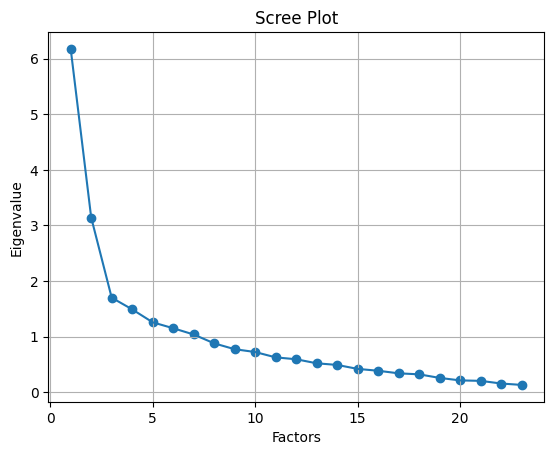

In [7]:
# Para a confirmação geraremos um scree plot no qual o número de
# fatores é igual ao número de pontos que possuem o coeficiente
# angular extremamente distindos entre si.

plt.figure()
plt.scatter(range(1, X.shape[1]+1), ev)
plt.plot(range(1, X.shape[1]+1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

De acordo com os resultados apresentados, o teste dos autovalores indica a presença de 6 fatores, enquanto o critério do Scree Plot sugere 4 fatores. Para maximizar a verossimilhança, utilizaremos a média dos resultados desses critérios, resultando em 5 fatores.

# Analise Fatorial Exploratória para 5 Fatores
---
Agora que definimos o número de fatores obteremos os insights dos dados.

In [8]:
fa = FactorAnalyzer(n_factors=5, rotation='oblimin')
fa.fit(X)

FactorAnalyzer(n_factors=5, rotation='oblimin', rotation_kwargs={})

**Gerando a matriz de cargas estimadas**

In [9]:
L = pd.DataFrame(fa.loadings_, index=X.columns)
np.round(L, 2)
L.index = X.columns
L.columns = ['F1', 'F2', 'F3', 'F4', 'F5']

print(L)


                                                          F1        F2  \
Para que ele(a) aprenda coisas novas                0.555306 -0.011364   
Como recompensa caso a criança apresente compor...  0.044222  0.041994   
Ameaço ou puno meu filho(a) com a retirada das ... -0.078433  0.012821   
Para que eu possa relaxar/descansar                -0.032638  0.528148   
Para que possa fazer atividades domésticas         -0.117743  0.580805   
Porque é educativo, meu filho(a) pode aprender ...  0.891079  0.068646   
Para que ele(a) tenha o que fazer e não fique e...  0.165800  0.383070   
Como atividade de lazer para ele(a)                 0.076358  0.106250   
Porque ele(a) me pede                               0.087360  0.292518   
Porque ele(a) gosta                                 0.077344  0.036491   
Para ajudá-lo(a) a relaxar/descansar                0.191235  0.207045   
Porque ele(a) faz birra caso eu não ofereça        -0.314826  0.128328   
Como parte do lazer da criança        

Para facilitar a visualização, os fatores com maior peso serão posicionados nas primeiras colunas. Utilizaremos um valor de corte de 0,3, de modo que apenas fatores com peso superior a 0,3 serão considerados para cada fator.

In [ ]:
L.sort_values(by='F1', ascending=False).head(8)

,F1,F2,F3,F4,F5
"Porque é educativo, meu filho(a) pode aprender coisas novas",0.891079,0.068646,-0.015673,-0.068962,-0.072565
Porque é positivo para o desenvolvimento dele(a),0.709658,-0.117369,0.123574,0.005117,0.006229
Porque eu acredito que isso ajuda a desenvolver seu raciocínio e linguagem do meu filho(a),0.660732,-0.087880,0.057280,0.002711,0.306459
Para que ele(a) aprenda coisas novas,0.555306,-0.011364,0.025638,0.092224,0.001520
Porque estimula imaginação e criatividade do meu filho(a),0.546785,-0.131513,0.312847,0.037016,0.162367
"Como atividade que fazemos juntos (como assistir vídeos, filmes juntos)",0.532670,0.136487,0.039051,0.019588,-0.159128
Como parte da rotina de estudo e realização de tarefas escolares,0.442101,0.104006,-0.332076,0.263721,0.231200
"Porque eu acredito que isso ajuda meu filho(a) a desenvolver interações sociais, se comunicar com amigos e familiares",0.307204,0.040472,0.049219,0.332793,0.135008


In [ ]:
L.sort_values(by='F2', ascending=False).head(7)

,F1,F2,F3,F4,F5
Para que eu possa ter tempo livre,-0.102681,0.759860,0.118556,0.018486,0.022016
Para que eu possa trabalhar em casa (home office),0.240759,0.613717,-0.122513,0.050393,-0.135797
Para que possa fazer atividades domésticas,-0.117743,0.580805,-0.078083,-0.010928,0.252680
Para que eu possa relaxar/descansar,-0.032638,0.528148,0.324551,-0.379915,-0.032259
"Para que ele(a) se comporte bem quando estamos fora de casa (restaurante, mercado, festas etc.)",-0.005567,0.490077,-0.130761,0.270145,0.113642
Para ajudar meu filho(a) a se comportar melhor,0.010629,0.449324,0.097707,0.112871,-0.102226
Para que ele(a) tenha o que fazer e não fique entediado,0.165800,0.383070,0.384657,0.038220,0.048950


In [ ]:
L.sort_values(by='F3', ascending=False).head(7)

,F1,F2,F3,F4,F5
Como parte do lazer da criança,0.066707,0.001884,0.799621,0.003860,0.159340
Como atividade de lazer para ele(a),0.076358,0.106250,0.741281,-0.064632,0.032257
Porque ele(a) gosta,0.077344,0.036491,0.616036,0.464786,-0.123305
Para ajudá-lo(a) a relaxar/descansar,0.191235,0.207045,0.408545,0.034904,0.203086
Para que ele(a) tenha o que fazer e não fique entediado,0.165800,0.383070,0.384657,0.038220,0.048950
Para que eu possa relaxar/descansar,-0.032638,0.528148,0.324551,-0.379915,-0.032259
Porque estimula imaginação e criatividade do meu filho(a),0.546785,-0.131513,0.312847,0.037016,0.162367


In [ ]:
L.sort_values(by='F4', ascending=False).head(5)

,F1,F2,F3,F4,F5
Ameaço ou puno meu filho(a) com a retirada das mídias eletrônicas ou impedimento do acesso caso ele(a) se comporte mal,-0.078433,0.012821,0.065402,0.473359,0.282941
Porque ele(a) gosta,0.077344,0.036491,0.616036,0.464786,-0.123305
Porque ele(a) faz birra caso eu não ofereça,-0.314826,0.128327,0.083239,0.434705,0.029296
Porque ele(a) me pede,0.087360,0.292518,0.283678,0.387092,-0.141470
"Porque eu acredito que isso ajuda meu filho(a) a desenvolver interações sociais, se comunicar com amigos e familiares",0.307204,0.040472,0.049219,0.332793,0.135008


In [ ]:
L.sort_values(by='F5', ascending=False).head(2)

,F1,F2,F3,F4,F5
Como recompensa caso a criança apresente comportamentos desejados,0.044222,0.041994,0.105252,0.002583,0.758624
Porque eu acredito que isso ajuda a desenvolver seu raciocínio e linguagem do meu filho(a),0.660732,-0.087880,0.057280,0.002711,0.306459


# Validação
---
Para validar a análise estatística, calcularemos o Alfa de Cronbach e verificaremos o percentual de variância explicado por cada fator na nossa análise.


In [11]:
# Calculo do alfa de cronbach
import pingouin as pg

alfa_cronbach = pg.cronbach_alpha(data=X)
print(f'O valor do alfa de cronbach: {alfa_cronbach[0]} e o intervalor de confiança: {alfa_cronbach[1]}')


O valor do alfa de cronbach: 0.862165202260424 e o intervalor de confiança: [0.818 0.9  ]


Considerando que um valor de Alfa de Cronbach superior a 0,8 é considerado muito bom, os valores obtidos podem ser considerados válidos.

*Matriz de Percentuais de variancia*

In [ ]:
mv = np.round(fa.get_factor_variance()/np.sum(fa.get_factor_variance())*100, 2)
print('Valores percentuais (comunialidade):')
print(mv)
print()

sum = np.sum(mv[0])
print(f'Os fatores explicam {sum}% dos casos')

Valores percentuais (comunialidade):
[[25.97 19.46 19.39  9.87  8.87]
 [ 1.13  0.85  0.84  0.43  0.39]
 [ 1.13  1.98  2.82  3.25  3.63]]

Os fatores explicam 83.56% dos casos


---
Como o estudo com 5 fatores gerou um 5º fator com apenas 2 pontos chave, o ideal é reduzirmos o número de fatores, portanto faremos os calculos para 4 fatores.

---

# Analise Fatorial Exploratória para 4 Fatores
---

In [12]:
fa4 = FactorAnalyzer(n_factors=4, rotation='oblimin')
fa4.fit(X)

FactorAnalyzer(n_factors=4, rotation='oblimin', rotation_kwargs={})

In [13]:
L4 = pd.DataFrame(fa4.loadings_, index=X.columns)
np.round(L, 2)
L4.index = X.columns
L4.columns = ['F1', 'F2', 'F3', 'F4']

print(L4)

                                                          F1        F2  \
Para que ele(a) aprenda coisas novas                0.555362  0.028322   
Como recompensa caso a criança apresente compor...  0.199027  0.244789   
Ameaço ou puno meu filho(a) com a retirada das ... -0.037708  0.158171   
Para que eu possa relaxar/descansar                -0.037868  0.293169   
Para que possa fazer atividades domésticas         -0.073060  0.000108   
Porque é educativo, meu filho(a) pode aprender ...  0.881099 -0.037044   
Para que ele(a) tenha o que fazer e não fique e...  0.150557  0.411234   
Como atividade de lazer para ele(a)                 0.043573  0.769981   
Porque ele(a) me pede                               0.038542  0.275578   
Porque ele(a) gosta                                 0.039374  0.576989   
Para ajudá-lo(a) a relaxar/descansar                0.201440  0.475470   
Porque ele(a) faz birra caso eu não ofereça        -0.336961  0.126637   
Como parte do lazer da criança        

Novamente utilizaremos os 0,3 como valor de corte e colocaremos em evidência as cargas relativas a cada fator.

In [14]:
L4.sort_values(by='F1', ascending=False).head(8)

,F1,F2,F3,F4
"Porque é educativo, meu filho(a) pode aprender coisas novas",0.881099,-0.037044,0.098068,-0.117597
Porque eu acredito que isso ajuda a desenvolver seu raciocínio e linguagem do meu filho(a),0.704985,0.140328,-0.121761,0.125652
Porque é positivo para o desenvolvimento dele(a),0.701256,0.133753,-0.103088,-0.010754
Porque estimula imaginação e criatividade do meu filho(a),0.558980,0.367989,-0.146792,0.080839
Para que ele(a) aprenda coisas novas,0.555362,0.028322,0.019393,0.063617
Como parte da rotina de estudo e realização de tarefas escolares,0.490035,-0.263114,0.110517,0.352146
"Como atividade que fazemos juntos (como assistir vídeos, filmes juntos)",0.489405,0.013439,0.170191,-0.066866
"Porque eu acredito que isso ajuda meu filho(a) a desenvolver interações sociais, se comunicar com amigos e familiares",0.315155,0.108037,0.061745,0.357804


In [16]:
L4.sort_values(by='F2', ascending=False).head(6)

,F1,F2,F3,F4
Como parte do lazer da criança,0.057501,0.860498,-0.028510,0.015237
Como atividade de lazer para ele(a),0.043573,0.769981,0.085976,-0.097122
Porque ele(a) gosta,0.039374,0.576989,0.128974,0.283439
Para ajudá-lo(a) a relaxar/descansar,0.201440,0.475470,0.174901,0.092053
Para que ele(a) tenha o que fazer e não fique entediado,0.150557,0.411234,0.381033,0.017682
Porque estimula imaginação e criatividade do meu filho(a),0.558980,0.367989,-0.146792,0.080839


In [23]:
L4.sort_values(by='F3', ascending=False).head(8)

,F1,F2,F3,F4
Para que eu possa ter tempo livre,-0.109534,0.131172,0.753614,-0.003635
Para que eu possa trabalhar em casa (home office),0.208104,-0.143540,0.642089,-0.024077
Para que possa fazer atividades domésticas,-0.073060,0.000108,0.507100,0.091835
"Para que ele(a) se comporte bem quando estamos fora de casa (restaurante, mercado, festas etc.)",0.002098,-0.079306,0.497416,0.298939
Para que eu possa relaxar/descansar,-0.037868,0.293169,0.488408,-0.397726
Para ajudar meu filho(a) a se comportar melhor,-0.024915,0.087682,0.476165,0.041106
Para que ele(a) tenha o que fazer e não fique entediado,0.150557,0.411234,0.381033,0.017682
Porque ele(a) me pede,0.038542,0.275578,0.353713,0.239649


In [25]:
L4.sort_values(by='F4', ascending=False).head(4)

,F1,F2,F3,F4
Ameaço ou puno meu filho(a) com a retirada das mídias eletrônicas ou impedimento do acesso caso ele(a) se comporte mal,-0.037708,0.158171,0.025832,0.539533
Porque ele(a) faz birra caso eu não ofereça,-0.336961,0.126637,0.158645,0.413972
"Porque eu acredito que isso ajuda meu filho(a) a desenvolver interações sociais, se comunicar com amigos e familiares",0.315155,0.108037,0.061745,0.357804
Como parte da rotina de estudo e realização de tarefas escolares,0.490035,-0.263114,0.110517,0.352146


# Validação

---

In [28]:
alfa_cronbach = pg.cronbach_alpha(data=X)
print(f'O valor do alfa de cronbach: {alfa_cronbach[0]} e o intervalor de confiança: {alfa_cronbach[1]}')

O valor do alfa de cronbach: 0.862165202260424 e o intervalor de confiança: [0.818 0.9  ]



Como previsto, o valor do Alfa de Cronbach permaneceu inalterado. Isso ocorre porque a matriz de variâncias (X) é a mesma, independentemente do número de fatores selecionados para o estudo.

In [27]:
mv = np.round(fa4.get_factor_variance()/np.sum(fa4.get_factor_variance())*100, 2)
print('Valores percentuais (comunialidade):')
print(mv)
print()

sum = np.sum(mv[0])
print(f'Os fatores explicam {sum}% dos casos')

Valores percentuais (comunialidade):
[[29.28 23.69 21.64 11.12]
 [ 1.27  1.03  0.94  0.48]
 [ 1.27  2.3   3.24  3.73]]

Os fatores explicam 85.73% dos casos


# Conclusão
---
Sendo assim, chega-se ao fim do trabalho estatístico desse estudo. Os pontos que de destaque são:

*   O alfa de cronbach foi de 0.862 o que se mostrou excelente para os dados.
*   O uso de 4 fatores se mostrou mais eficiente em comparação com o uso de 5 fatores isso porque esse primeiro engloba mais casos (85.73% x 83.53%) com uma menor dimensão de matriz o que, além de tudo, reduz o custo computacional.
*   O uso de 4 fatores também mostrou uma menor correlação entre o fatores como podemos observar pelas matrizes de correlação de cargas, com isso podemos considerar os fatores 'mais independentes ou menos interligados' em comparação com o uso de 5 fatores.
*   Para esse teste foram captadas um menor número de amostras que o necessário e portanto embora a estatística se mostre bem coessa não podemos generalizar esses resultados e portanto, esse estudo é valido como entendimento de comportamento ou análise primária.


Obrigado pela leitura.

---

Henrique Moreira Romanini

Engenharia Elétrica - Escola Politécnica

Universidade de São Paulo

Contato: henriquemromanini@gmail.com

---

